# Project 1 ---> Coffee Data Analysis and plotting different graphs

In [1]:
# imports required in this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


In [2]:
#importing coffee_production dataset and transposing it and removing is indexes and keeping year name itself as index and droping total production column from the dataset
coffee_production = pd.read_csv(r"C:\Users\KAUSHAL PRAJAPATI\Downloads\Data+Viz+with+Matplotlib+&+Seaborn\Data Viz with Matplotlib & Seaborn\Data\coffee\total-production.csv").T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop("total_production")

coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [3]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Angola                            29 non-null     object
 1   Bolivia (Plurinational State of)  29 non-null     object
 2   Brazil                            29 non-null     object
 3   Burundi                           29 non-null     object
 4   Ecuador                           29 non-null     object
 5   Indonesia                         29 non-null     object
 6   Madagascar                        29 non-null     object
 7   Malawi                            29 non-null     object
 8   Papua New Guinea                  29 non-null     object
 9   Paraguay                          29 non-null     object
 10  Peru                              29 non-null     object
 11  Rwanda                            29 non-null     object
 12  Timor-Leste             

In [4]:
# creating top_producers of coffee by calculating sum of all the countries production and sorting it descending order and then only selecting top 10 entries only.
top_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]
top_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

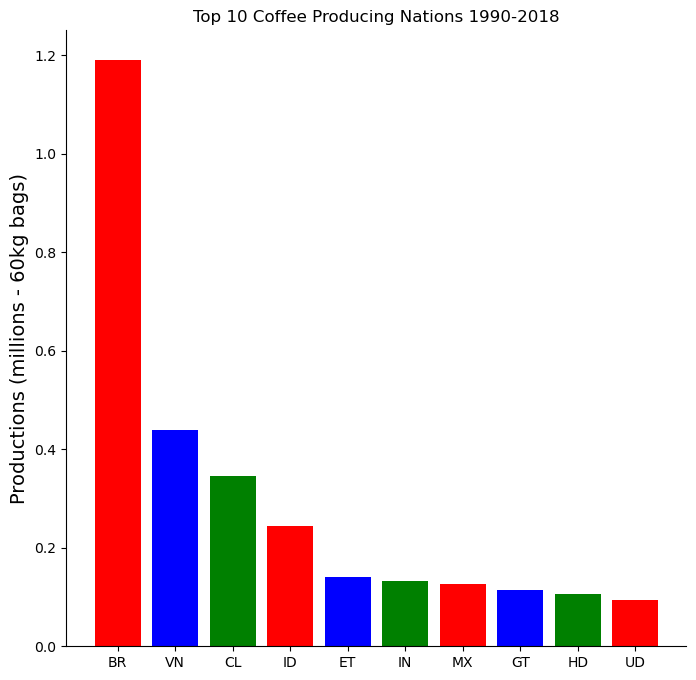

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
colors = ["red", "blue", "green"]
ax.bar(x=top_producers.index, height =  top_producers/1000000, color = colors)
positions = list(range(10))
labels = ["BR", "VN", "CL", "ID", "ET", "IN", "MX", "GT", "HD", "UD"]


ax.set_title("Top 10 Coffee Producing Nations 1990-2018")
ax.set_ylabel("Productions (millions - 60kg bags)", fontsize=14)

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# Top 6 nations over time
Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [6]:
top6_nations = coffee_production.loc[:, ["Brazil","Viet Nam","Colombia","Indonesia","Ethiopia","India"]]
top6_nations.index.astype("datetime64[ns]")
top6_nations.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia,India
1990,27285.6286,1310.288,14396.0,7441.383,2909.451,2828.687
1991,27293.4934,1437.848,17980.397,8493.196,2924.664,2999.749
1992,34603.3542,2340.447,14946.878,5569.478,1825.171,2823.497
1993,28166.9786,3020.216,11422.422,6743.288,2967.004,3533.181
1994,28192.047,3631.609,12964.0,5367.878,2762.73,3001.564


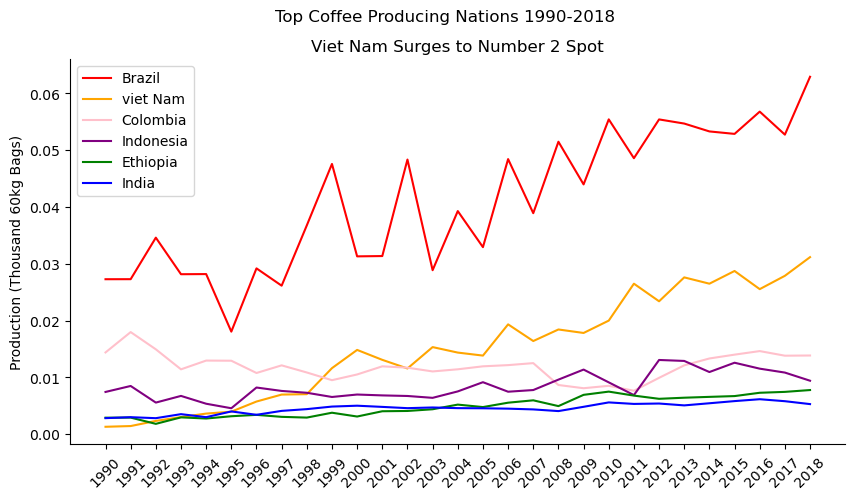

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(top6_nations.index, coffee_production["Brazil"]/1000000, label="Brazil", color="red")
ax.plot(top6_nations.index, coffee_production["Viet Nam"]/1000000, label="viet Nam", color="orange")
ax.plot(top6_nations.index, coffee_production["Colombia"]/1000000, label="Colombia", color="pink")
ax.plot(top6_nations.index, coffee_production["Indonesia"]/1000000, label="Indonesia", color="purple")
ax.plot(top6_nations.index, coffee_production["Ethiopia"]/1000000, label="Ethiopia", color="green")
ax.plot(top6_nations.index, coffee_production["India"]/1000000, label="India", color="blue")

fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (Thousand 60kg Bags)")

ax.set_xticks(range(len(top6_nations.index)))
ax.set_xticklabels(top6_nations.index,rotation=45)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend()

plt.show()

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [23]:
#creating dataframe named brazil_vs_others from coffee_production and assigning rest of the world except brazil and then summing up all the data and now 
#other column has brazil sum and  rest_of_world sum."
brazil_vs_others =  coffee_production.assign(
                    rest_of_world = coffee_production.drop("Brazil", axis=1)
                    .sum(axis=1)).loc[:, ["Brazil", "rest_of_world"]].astype({"Brazil": "float64", "rest_of_world":"float64"})
brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,65944.4310
1991,27293.4934,73973.1910
1992,34603.3542,63922.5450
1993,28166.9786,63597.6430
1994,28192.0470,65121.1470
1995,18060.2022,69257.2560
1996,29196.7430,74105.8530
1997,26148.0040,73713.1950
1998,36760.8533,72131.3598
1999,47577.8065,83805.9902


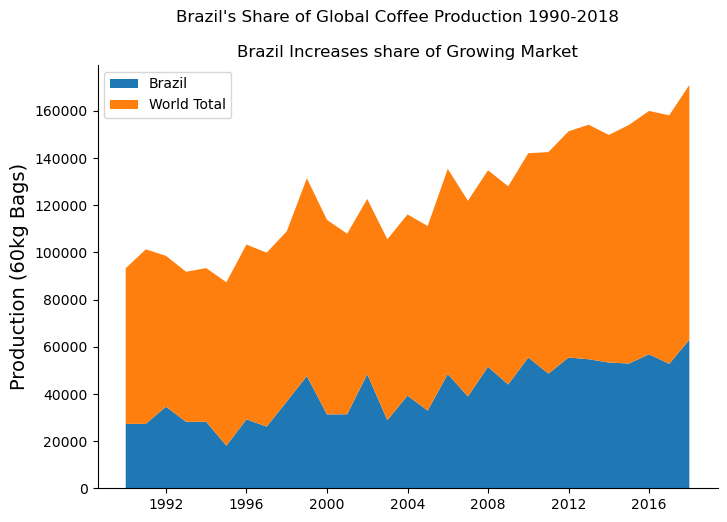

In [22]:
fig, ax = plt.subplots(figsize=(8,5.5))

ax.stackplot(
    brazil_vs_others.index.astype("datetime64[ns]"), 
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "World Total"]
)

fig.suptitle("Brazil's Share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases share of Growing Market")
ax.set_ylabel("Production (60kg Bags)", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc="upper left")

plt.show()

## PRICE RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

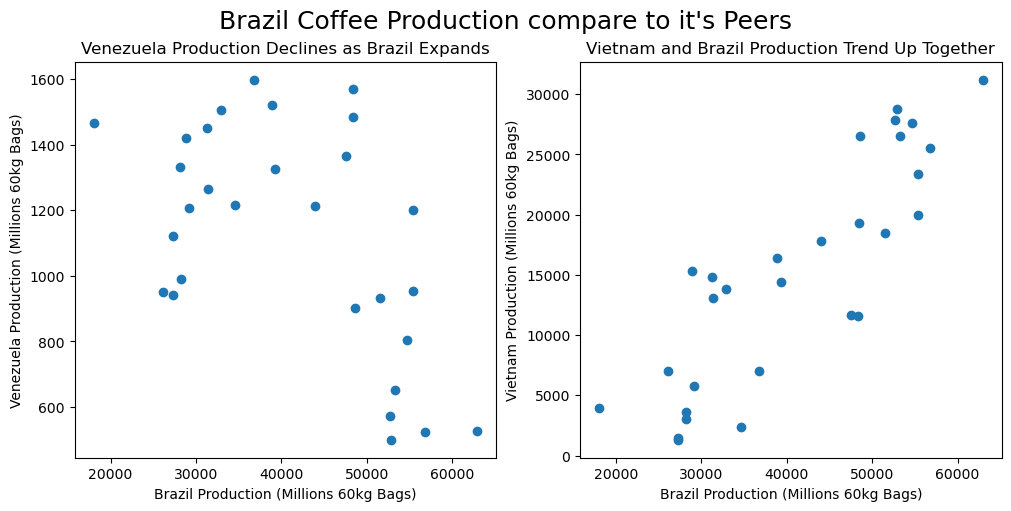

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)

fig.suptitle("Brazil Coffee Production compare to it's Peers", fontsize=18)

ax[0].scatter(
    coffee_production["Brazil"], 
    coffee_production["Venezuela"]
)

ax[0].set_title("Venezuela Production Declines as Brazil Expands")
ax[0].set_ylabel("Venezuela Production (Millions 60kg Bags)")
ax[0].set_xlabel("Brazil Production (Millions 60kg Bags)")


ax[1].scatter(
    coffee_production["Brazil"], 
    coffee_production["Viet Nam"], 
)

ax[1].set_title("Vietnam and Brazil Production Trend Up Together")
ax[1].set_ylabel("Vietnam Production (Millions 60kg Bags)")
ax[1].set_xlabel("Brazil Production (Millions 60kg Bags)")


plt.show()

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 6 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [85]:
coffee_production.drop(columns=["Rest_of_world"], inplace=True)

In [86]:
coffee_production["Rest_of_world"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                            "India"], axis=1).sum(axis=1)

coffee_production_top6_2018 = coffee_production.loc["2018", ["Brazil", "Viet Nam", 
                                                             "Colombia", "Indonesia", 
                                                             "Ethiopia", "India", 
                                                             "Rest_of_world"]
                                                    ]

coffee_production


total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen,Rest_of_world
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0,37058.622
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0,40137.337
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0,36417.074
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0,35911.532
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0,37393.366
1995,62.109,142.485,18060.2022,433.98,1888.233,4573.429,785.009,91.235,1002.363,22.843,...,43.768,35.595,1317.226,84.401,17.629,3243.584,1466.554,3970.086,0.0,40598.375
1996,70.925,124.579,29196.743,400.969,1992.914,8220.584,849.008,48.65,1089.348,25.563,...,40.91,36.999,1403.581,290.586,18.188,3418.724,1206.162,5752.481,0.0,42529.375
1997,64.33,140.719,26148.004,249.785,1190.663,7620.778,623.804,60.82,1074.021,23.379,...,49.679,57.584,1293.076,221.078,19.392,3439.868,951.285,6978.942,0.0,39825.359
1998,85.344,137.985,36760.8533,491.992,1205.968,7295.955,991.799,64.321,1352.149,58.347,...,26.882,45.738,915.986,321.486,17.018,3385.839,1597.279,7051.722,68.7007,39571.2278
1999,54.939,157.702,47577.8065,350.55,1197.6832,6557.0662,427.317,59.0,1387.0519,20.241,...,59.02,31.716,1272.8378,262.808,16.89,2862.447,1366.835,11630.9138,60.579,47455.1241


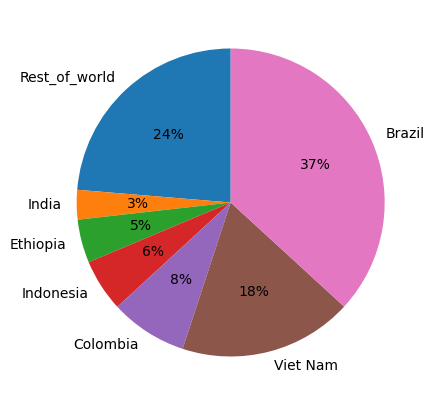

In [90]:
fig, ax = plt.subplots(figsize=(10,5))

ax.pie(coffee_production_top6_2018[::-1], startangle=90,
        autopct="%.0f%%",
        labels=list(coffee_production_top6_2018.index[::-1]),)

plt.show()

In [91]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64", "rest_of_world":"float64"})
                   )


brazil_vs_others

total_production,Brazil,rest_of_world
1990,27285.6286,103003.0530
1991,27293.4934,114110.5280
1992,34603.3542,100339.6190
1993,28166.9786,99509.1750
1994,28192.0470,102514.5130
1995,18060.2022,109855.6310
1996,29196.7430,116635.2280
1997,26148.0040,113538.5540
1998,36760.8533,111702.5876
1999,47577.8065,131261.1143


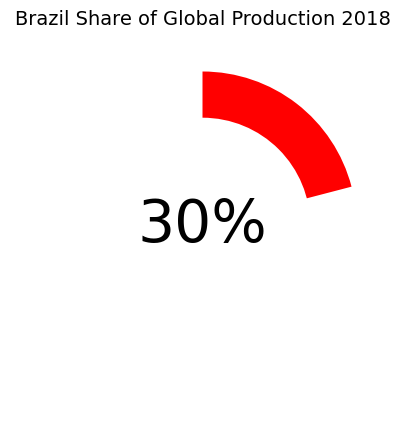

In [104]:
fig, ax = plt.subplots(figsize=(10,5))

ax.pie(brazil_vs_others.iloc[0].sort_values(ascending=False), 
          startangle=90,
          labels = ["", ""],
          # autopct = '%0.0f%%',
          pctdistance = .85, 
          colors=["white", "red"]
         )

hole = plt.Circle((0, 0),0.7, fc="white")
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['2018', 'Brazil'] / brazil_vs_others.loc['2018'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 2018", fontsize=14)


plt.show()       

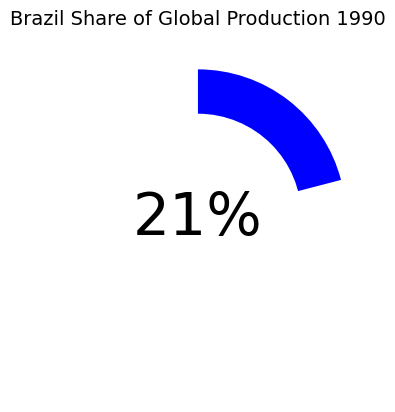

In [105]:
fig, ax = plt.subplots()

ax.pie(
    brazil_vs_others.iloc[0].sort_values(ascending=False),
    startangle=90,
    labels = ["", ""],
    #autopct='%.0f%%',
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 
    0, 
    f"{round((brazil_vs_others.loc['1990', 'Brazil'] / brazil_vs_others.loc['1990'].sum()*100))}%", 
    ha='center', 
    va='center', 
    fontsize=42
)
  

ax.set_title("Brazil Share of Global Production 1990", fontsize=14)

plt.show()

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.